In [13]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import sys
import os


In [14]:
def get_yahoo_data(ticker='msft'):
    #ticker = input("Please enter the sticker symbol for the Company: ")
    GetCoInformation = yf.Ticker(ticker)

    # get all key value pairs that are available
    for key, value in GetCoInformation.info.items():
        print(key, ":", value)

In [15]:
get_yahoo_data()
msft = yf.Ticker("MSFT")

address1 : One Microsoft Way
city : Redmond
state : WA
zip : 98052-6399
country : United States
phone : 425 882 8080
website : https://www.microsoft.com
industry : Software - Infrastructure
industryKey : software-infrastructure
industryDisp : Software - Infrastructure
sector : Technology
sectorKey : technology
sectorDisp : Technology
longBusinessSummary : Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power apps, and power automate; and on-premises ERP and CRM applications. 

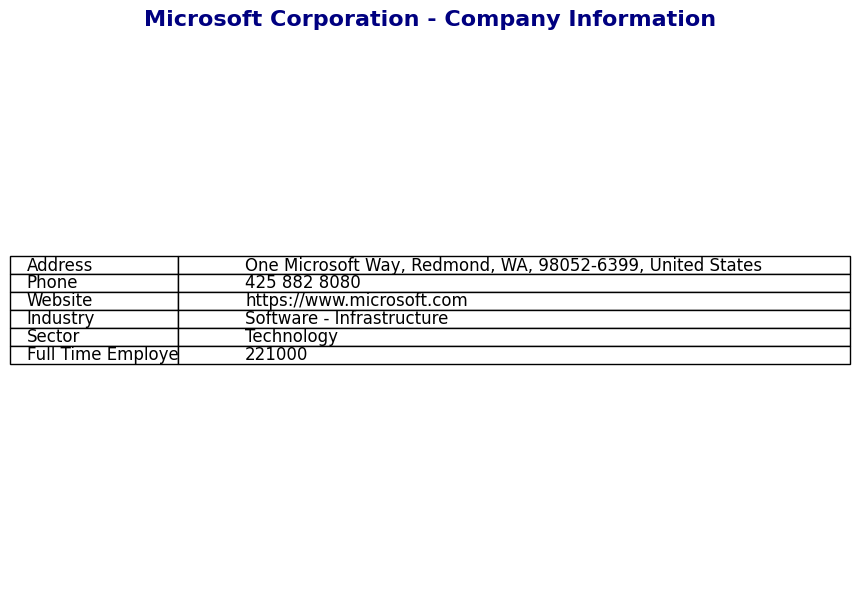

In [16]:
import matplotlib.pyplot as plt
import textwrap

# Company descriptive information
company_info = {
    "Address": "One Microsoft Way, Redmond, WA, 98052-6399, United States",
    "Phone": "425 882 8080",
    "Website": "https://www.microsoft.com",
    "Industry": "Software - Infrastructure",
    "Sector": "Technology",
    "Full Time Employees": msft.info.get('fullTimeEmployees'),
}

# Plotting company descriptive information
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('off')
ax.axis('tight')

info_table = [
    ["Address", company_info["Address"]],
    ["Phone", company_info["Phone"]],
    ["Website", company_info["Website"]],
    ["Industry", company_info["Industry"]],
    ["Sector", company_info["Sector"]],
    ["Full Time Employees", company_info["Full Time Employees"]]
]

# Add title
plt.title("Microsoft Corporation - Company Information", fontsize=16, fontweight='bold', color='navy')

# Create table
table = plt.table(cellText=info_table, colLabels=None, cellLoc='left', loc='center', colWidths=[0.2, 0.8])

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Adjust layout
plt.subplots_adjust(left=0.2, top=0.8)

# Display the plot
plt.show()



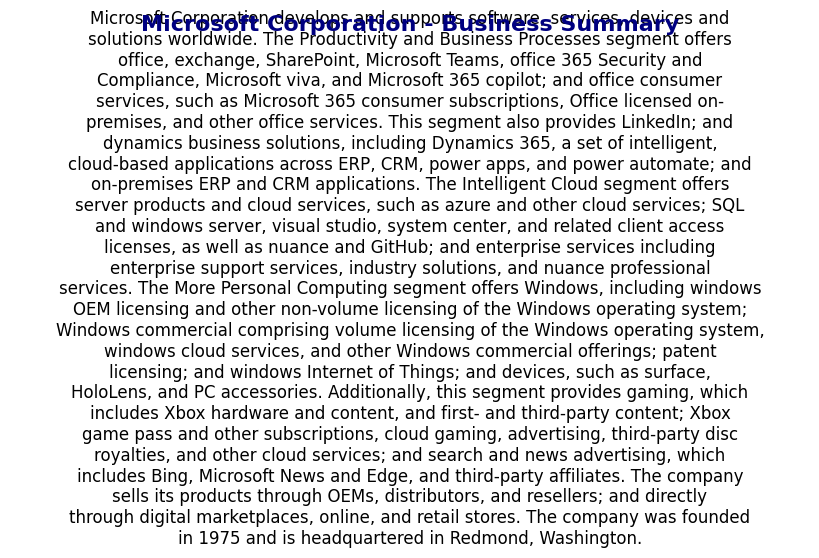

In [17]:
import matplotlib.pyplot as plt
import textwrap

# Company descriptive information
company_info = {
    "Business Summary": msft.info.get('longBusinessSummary')
}

# Function to wrap text
def wrap_text(text, width):
    return "\n".join(textwrap.wrap(text, width))

# Wrapping the business summary text
wrapped_summary = wrap_text(company_info["Business Summary"], 80)

# Plotting business summary
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('off')

plt.title("Microsoft Corporation - Business Summary", fontsize=16, fontweight='bold', color='navy')
plt.text(0.5, 0.5, wrapped_summary, fontsize=12, va='center', ha='center', wrap=True, color='black')

# Adjust layout to make sure text fits
plt.subplots_adjust(left=0.1, right=0.9, top=0.8, bottom=0.2)

# Display the plot
plt.show()


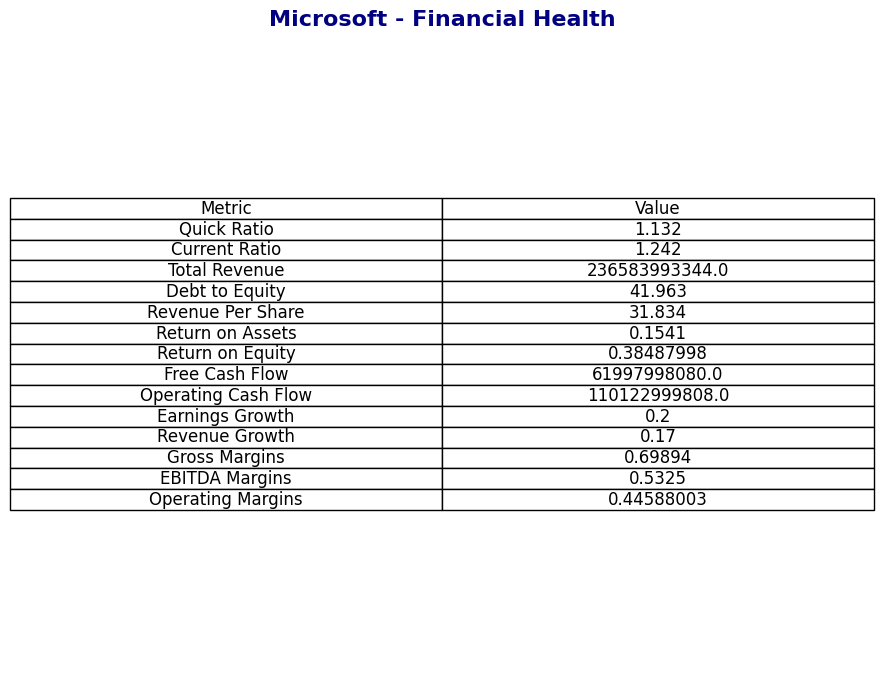

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Financial health metrics
financial_health_data = {
    "Metric": [
        "Quick Ratio", "Current Ratio", "Total Revenue", "Debt to Equity", "Revenue Per Share",
        "Return on Assets", "Return on Equity", "Free Cash Flow", "Operating Cash Flow",
        "Earnings Growth", "Revenue Growth", "Gross Margins", "EBITDA Margins", "Operating Margins"
    ],
    "Value": [
        1.132, 1.242, 236583993344, 41.963, 31.834,
        0.1541, 0.38487998, 61997998080, 110122999808,
        0.2, 0.17, 0.69894, 0.5325, 0.44588003
    ]
}

# Creating a DataFrame for financial health data
df_health = pd.DataFrame(financial_health_data)

# Plotting financial health information in a table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')
ax.axis('tight')

# Creating the table
table = ax.table(cellText=df_health.values, colLabels=df_health.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Adding title
plt.title("Microsoft - Financial Health", fontsize=16, fontweight='bold', color='navy')

# Adjust layout
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)

# Display the plot
plt.show()


In [19]:
headers = {
    'User-Agent': 'amarkumareps@gmail.com',
    'Accept': 'application/json'
}

In [20]:
def cik_matching_ticker(ticker='msft', headers=headers):
    ticker = ticker.upper().replace(".", "-")
    ticker_json = requests.get(
        "https://www.sec.gov/files/company_tickers.json", headers=headers
    ).json()

    for company in ticker_json.values():
        if company["ticker"] == ticker:
            cik = str(company["cik_str"]).zfill(10)
            return cik
    raise ValueError(f"Ticker {ticker} not found in SEC database")

def get_company():
    ticker = input('Please enter the ticker symbol for your Company of interest: ')
    print("You entered: ", ticker)
    try:
        cik_matching_ticker(ticker)
        return ticker
    except ValueError:
        print("You entered an invalid Ticker symbol")

def get_facts(ticker='msft', headers=headers):
    """
    Gets all the Facts for a company as a Json document.
    """
    cik = cik_matching_ticker(ticker)
    url = f"https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json"
    company_facts = requests.get(url, headers=headers).json()
    return company_facts


In [21]:
def facts_DF(ticker='msft', headers=headers):
    facts = get_facts(ticker, headers)
    us_gaap_data = facts["facts"]["us-gaap"]
    df_data = []
    for fact, details in us_gaap_data.items():
        for unit in details["units"]:
            for item in details["units"][unit]:
                row = item.copy()
                row["fact"] = fact
                df_data.append(row)

    df = pd.DataFrame(df_data)
    df["end"] = pd.to_datetime(df["end"])
    df["start"] = pd.to_datetime(df["start"])
    df = df.drop_duplicates(subset=["fact", "end", "val"])
    #df.set_index("end", inplace=True)
    labels_dict = {fact: details["label"] for fact, details in us_gaap_data.items()}
    return df, labels_dict


In [22]:
ticker = 'msft'
facts, label_dict = facts_DF(ticker='msft')


In [23]:
Company_10k = facts[facts['form'] == '10-K']
Company_10k = Company_10k[['fact', 'end', 'val']]
Company_10k = Company_10k.sort_values(by=['fact', 'end'])

Company_10k_Summary = Company_10k[Company_10k['fact'].isin(['Assets', 'Liabilities', 'StockholdersEquity'])]
unique_facts = Company_10k_Summary['fact'].unique()


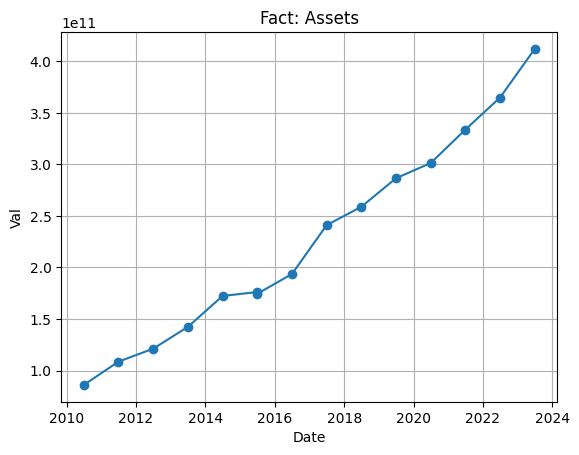

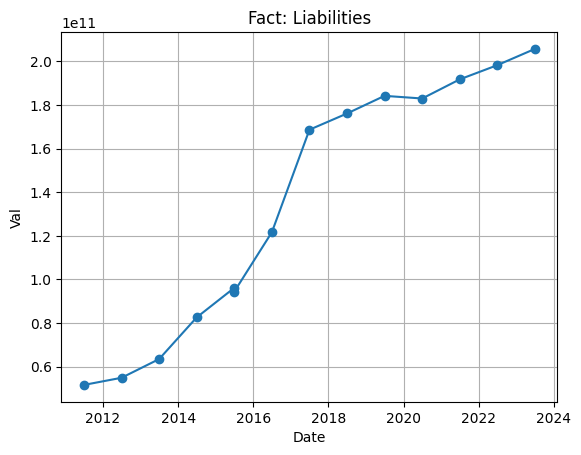

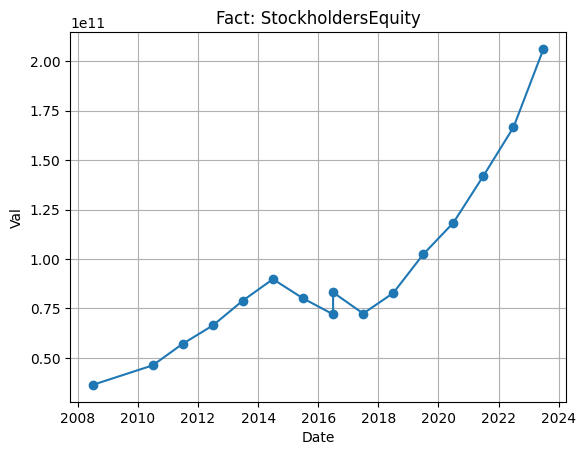

In [24]:
# Plotting
for fact in unique_facts:
    filtered_df = Company_10k_Summary[Company_10k_Summary['fact'] == fact]
    plt.figure()
    plt.plot(filtered_df['end'], filtered_df['val'], marker='o')
    plt.title(f'Fact: {fact}')
    plt.xlabel('Date')
    plt.ylabel('Val')
    plt.grid(True)
    filename = ticker + "_" + fact + "_plot.png"
    # Save the plot to a file
    plt.savefig(filename)
    #plt.show()
